In [21]:
!pip install matplotlib==3.1.3


In [22]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(512, 512, 3)


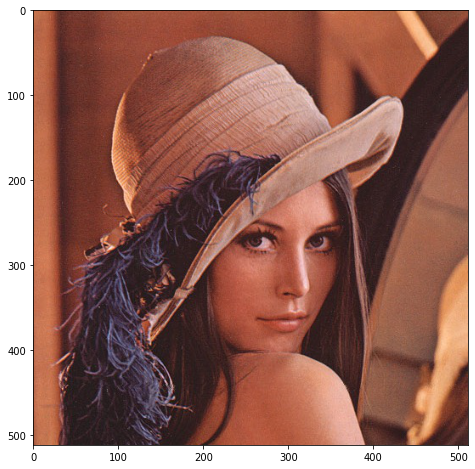

In [26]:
image_raw = imread("/content/gdrive/MyDrive/CS231.M11/Baitap/Baitap1/images/lena.jpg")
print(image_raw.shape)
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

In [27]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

print(image_bw)

(512, 512)
1.0
[[0.51994498 0.54057772 0.52407153 ... 0.38651994 0.38789546 0.38789546]
 [0.52819807 0.53645117 0.53232462 ... 0.3823934  0.39202201 0.39614856]
 [0.54057772 0.51994498 0.54057772 ... 0.39064649 0.39064649 0.39064649]
 ...
 [0.43878955 0.43191197 0.46492435 ... 0.19669876 0.19807428 0.19807428]
 [0.43878955 0.43878955 0.4525447  ... 0.19669876 0.20632737 0.2173315 ]
 [0.40577717 0.4264099  0.44016506 ... 0.19257221 0.2090784  0.22971114]]


Number of components explaining 95% variance: 52


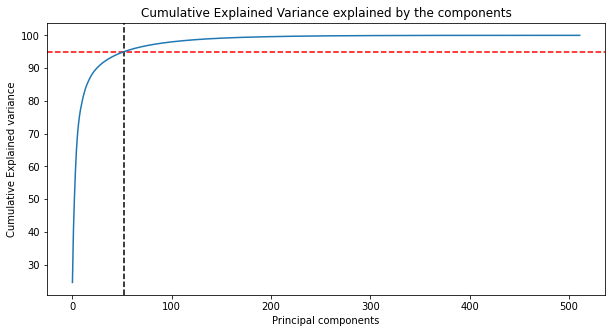

In [28]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

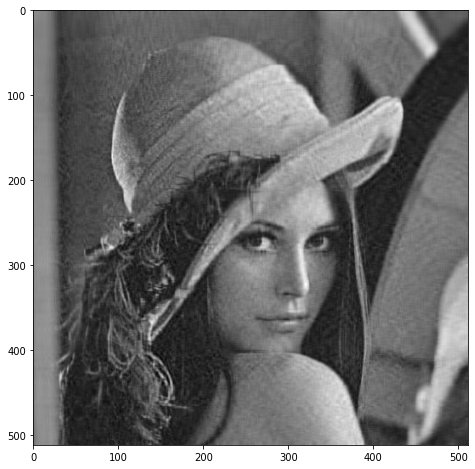

In [29]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

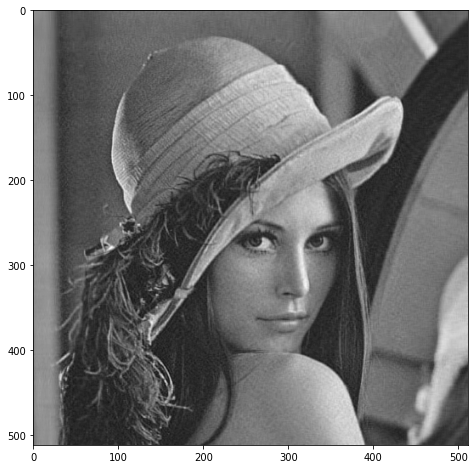

In [30]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 150
plt.figure(figsize=[12,8])
plot_at_k(100)

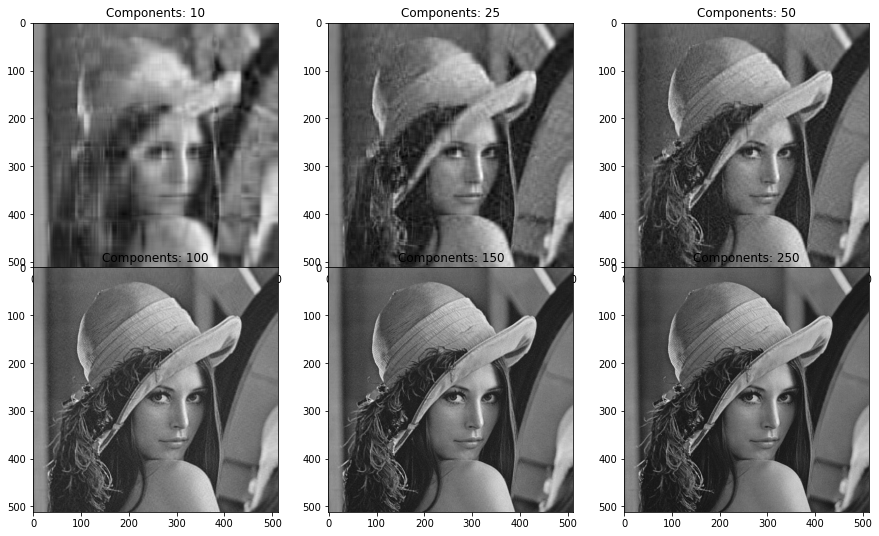

In [31]:
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()